<a href="https://colab.research.google.com/github/jithesh9539/Connected_Deep_Networks/blob/main/d)_Pytorch_Lightening_Highlevel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import numpy as np
from typing import Callable
import torch
import torch.nn as nn

In [2]:
n_samples = 200
input_dim = 3

x_true = torch.FloatTensor(n_samples, input_dim).uniform_(-1,1)
weights_true = torch.FloatTensor([[5, 1, 4],[2, 1, 2]]).T
bias_true = torch.tensor([0.5, 0.25])
y_true = torch.mm(x_true ** 2, weights_true) + torch.mm(x_true, weights_true) + bias_true

x_tensor = x_true.clone().detach().requires_grad_(True).float()
y_true_tensor = y_true.clone().detach().requires_grad_(True).float()

print(f'x: {x_tensor.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true_tensor.shape}')

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([2]), y: torch.Size([200, 2])


In [3]:
class TorchModel(nn.Module):
  def __init__(self, input_dim, num_hidden, ouput_dim):
    super().__init__()
    self.linear1 = nn.Linear(input_dim, num_hidden)
    self.relu1 = nn.ReLU()
    self.relu2 = nn.ReLU()
    self.linear2 = nn.Linear(num_hidden, ouput_dim)
  
  def forward(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    r2 = self.relu1(r1)
    l2 = self.linear2(r2)
    return l2

In [4]:
loss = nn.MSELoss()

model = TorchModel(3, 20, 2)

y_pred_tensor = model(x_tensor)

loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(22.8250, grad_fn=<MseLossBackward0>)


In [5]:
# Test just one forward and backward step
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

optimizer.zero_grad()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)
loss_gradient = loss_value.backward()
optimizer.step()

y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(loss_value)

tensor(22.8250, grad_fn=<MseLossBackward0>)
tensor(17.8678, grad_fn=<MseLossBackward0>)


In [6]:
def torch_fit(x, y, model: Callable, loss: Callable, lr: float, num_epochs: int):
  optimizer = torch.optim.SGD(model.parameters(), lr=lr)
  for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred_tensor = model(x_tensor)
    loss_value = loss(y_pred_tensor, y_true_tensor)
    if epoch % 1000 == 0:
      print(loss_value)
    loss_value.backward()
    optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.05, num_epochs=20000)
y_pred = model(x_tensor)
y_pred = y_pred.cpu().detach().numpy()

tensor(17.8678, grad_fn=<MseLossBackward0>)
tensor(0.0717, grad_fn=<MseLossBackward0>)
tensor(0.0548, grad_fn=<MseLossBackward0>)
tensor(0.0462, grad_fn=<MseLossBackward0>)
tensor(0.0399, grad_fn=<MseLossBackward0>)
tensor(0.0350, grad_fn=<MseLossBackward0>)
tensor(0.0312, grad_fn=<MseLossBackward0>)
tensor(0.0266, grad_fn=<MseLossBackward0>)
tensor(0.0230, grad_fn=<MseLossBackward0>)
tensor(0.0205, grad_fn=<MseLossBackward0>)
tensor(0.0191, grad_fn=<MseLossBackward0>)
tensor(0.0181, grad_fn=<MseLossBackward0>)
tensor(0.0172, grad_fn=<MseLossBackward0>)
tensor(0.0165, grad_fn=<MseLossBackward0>)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.0152, grad_fn=<MseLossBackward0>)
tensor(0.0146, grad_fn=<MseLossBackward0>)
tensor(0.0142, grad_fn=<MseLossBackward0>)
tensor(0.0136, grad_fn=<MseLossBackward0>)


In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot(x, y_true, y_pred):
  tsne = TSNE(n_components=1, random_state=0)
  x_2d = tsne.fit_transform(x)
  yt_2d = tsne.fit_transform(y_true)
  yp_2d = tsne.fit_transform(y_pred)

  plt.figure(figsize=(6, 5))
  plt.scatter(x_2d[:, 0], yt_2d[:, 0], c='b', label='y_true')
  plt.scatter(x_2d[:, 0], yp_2d[:, 0], c='y', label='y_pred')
  plt.legend()
  plt.title('TSNE Distribution plot for y_true and y_pred with X')
  plt.show()

def plot_3d(x, y, y_pred=None):
  import matplotlib.pyplot as plt
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], y, label='y_true')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], y_pred, label='y_pred')
  plt.legend()

In [8]:
y_pred_np = y_pred
y_true_np = y_true.detach().numpy()
x_np = x_true.detach().numpy()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

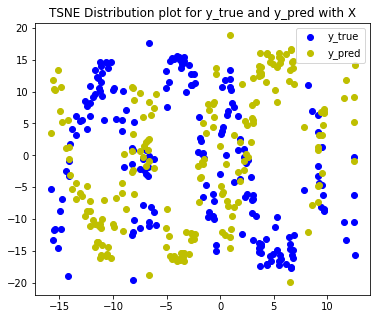

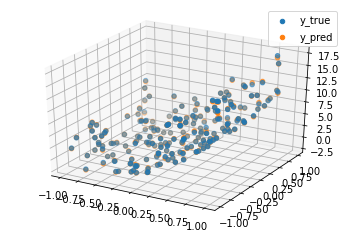

In [9]:
plot(x_np, y_true_np, y_pred_np)
plot_3d(x_np, y_true_np[:, 0], y_pred=y_pred_np[:, 0])